**Photoplethysmography(PPG) signal to predict an elevated shock index**

**TEAM12**:


*1. Sai Raghavendra Vibhav Chimatapu


*2. Rikin Basu


**Course:** DAAN 897– Deep Learning (Spring II, 2020)

**Problem Statement**

Using PPG and ABP signals to indicate whether a patient is critically ill or not

**Required packages**

In [29]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os

**Data Preprocessing**

In [30]:
#Reading our dataset
df = pd.read_csv('Shock_index.csv')

In [31]:
#Printing the first 5 rows
df.head()

,Heart_Rate,Systolic_blood_pressure(SBP),Shock_index,critically ill
0,54,28.56250,1.890591,1
1,45,52.50000,0.857143,0
2,69,66.81250,1.032741,1
3,90,73.78125,1.219822,1
4,87,86.81250,1.002160,1


In [18]:
#Printing number of critically ill patients
count = 0
for i in range(0, len(df['critically ill'])):
    if df['critically ill'][i] == 1:
        count = count + 1
    else:
        continue
print(count)

27


In [19]:
#Dropping columns not needed for analysis and preparing our target variable
Y = df['critically ill']
df = df.drop(['critically ill'], axis = 1)

In [20]:
df = df.drop(['Shock_index'], axis = 1)

In [21]:
#Printing the Predictor variables
X = df
print(X)

    Heart_Rate  Systolic_blood_pressure(SBP)
0           54                      28.56250
1           45                      52.50000
2           69                      66.81250
3           90                      73.78125
4           87                      86.81250
5           78                      43.12500
6          114                      70.40625
7           84                      62.84375
8           90                      93.87500
9          120                      59.68750
10         123                      18.03125
11          66                      90.68750
12          72                      52.18750
13          78                      55.31250
14          69                      96.28125
15          84                      94.34375
16         114                      57.18750
17          81                      74.46875
18         123                      62.46875
19          48                      84.46875
20          78                      67.43750
21        

***Code for plotting accuracy and loss curves***

In [26]:
from sklearn import metrics
def plot_loss(loss,val_loss):
  plt.figure()
  plt.plot(loss)
  plt.plot(val_loss)
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper right')
  plt.show()
def plot_accuracy(acc,val_acc):
  # Plot training & validation accuracy values
  plt.figure()
  plt.plot(acc)
  plt.plot(val_acc)
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

In [65]:
x = pd.DataFrame(x, columns =['Heart_Rate', 'Systolic_blood_pressure(SBP)'])

In [66]:
prediction = model.predict(x, verbose=1)
print(prediction)

1/1 [==============================] - 0s 31ms/step
[[0.26294938]]


Model prediction is closer to 1 meaning that the value shock index is 1 or more thus the patient requiring care.

**METHODOLOGY**


For our model building we have decided to go ahead with the following 3 approaches:
1. Self tuned DNN.
2. DNN with keras tuner.
3. Random forest classifier

As we have only 2 columns and 48 rows a DNN might not be an ideal choice thus we have also considered using a supervised machine learning technique. After building these models and comparing their performance we will select the model with highest train and test accuracy thus fitting our use case.


***MODEL 1***

1. In our 1st model we will create a neural network with 2 Dense layers with 16 units each having a ‘relu’ activation function. We also add a dropout value of 0.2. 
2. The last layer in the DNN is output layer with 1 unit as we have a binary classification and activation function as ‘sigmoid’.

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)
print("Shape of Training Data",X_train.shape)
print("Shape of Testing Data",X_test.shape)

Shape of Training Data (38, 2)
Shape of Testing Data (10, 2)


In [54]:
model = tf.keras.Sequential([
    #1st dense layer with 16 units
        tf.keras.layers.Dense(16, activation = 'relu'),
    #droput function
        tf.keras.layers.Dropout(0.2),
    #2nd dense layer with 16 units
        tf.keras.layers.Dense(16, activation = 'relu'),
    #output layer with acitvation function as sigmoid
        tf.keras.layers.Dense(1, activation = 'sigmoid')    
])
#Compiling model on adam optimizer and loss as binary crossentropy
model.compile(optimizer = 'Adam',
                loss = 'binary_crossentropy',
                metrics=['accuracy'])

**MODEL EVALUATION**

In [58]:
history1 = model.fit(X_train, Y_train, epochs = 15, validation_data = (X_test,Y_test))

Epoch 1/15
2/2 [==============================] - 0s 97ms/step - loss: 0.9198 - accuracy: 0.7632 - val_loss: 0.2174 - val_accuracy: 0.9000
Epoch 2/15
2/2 [==============================] - 0s 39ms/step - loss: 1.2831 - accuracy: 0.7632 - val_loss: 0.2081 - val_accuracy: 0.9000
Epoch 3/15
2/2 [==============================] - 0s 41ms/step - loss: 0.9309 - accuracy: 0.7895 - val_loss: 0.2085 - val_accuracy: 0.9000
Epoch 4/15
2/2 [==============================] - 0s 36ms/step - loss: 0.3950 - accuracy: 0.8158 - val_loss: 0.2101 - val_accuracy: 0.9000
Epoch 5/15
2/2 [==============================] - 0s 47ms/step - loss: 0.2676 - accuracy: 0.8421 - val_loss: 0.2146 - val_accuracy: 0.9000
Epoch 6/15
2/2 [==============================] - 0s 36ms/step - loss: 0.4226 - accuracy: 0.9474 - val_loss: 0.2169 - val_accuracy: 0.9000
Epoch 7/15
2/2 [==============================] - 0s 35ms/step - loss: 0.2143 - accuracy: 0.8684 - val_loss: 0.2150 - val_accuracy: 0.9000
Epoch 8/15
2/2 [===========

***Loss and Accuracy curves***

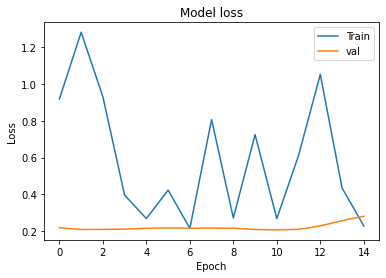

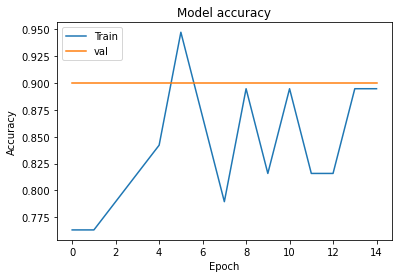

In [59]:
plot_loss(history1.history['loss'], history1.history['val_loss'])
# Plot train vs test accuracy during training
plot_accuracy(history1.history['accuracy'], history1.history['val_accuracy'])

***Train and test metrics***

In [60]:
results = model.evaluate(X_train, Y_train,verbose=0)
print("train loss, train acc:", results)
results = model.evaluate(X_test, Y_test,verbose=0)
print("test loss, test acc:", results)

train loss, train acc: [0.09447011351585388, 0.9736841917037964]
test loss, test acc: [0.2804188132286072, 0.8999999761581421]


***Saving model weights and biases***

In [62]:
from keras.layers import Dense, Dropout, Activation, Flatten
wt = open('weights1.csv', 'w')
bs = open('biases1.csv', 'w')
for idx,i in enumerate(model.layers):
  if(isinstance(i, Dense)):
    weights = i.get_weights()[0]
    biases = i.get_weights()[1]
    weights = weights.flatten()
    biases = biases.flatten()
    print(weights.shape, biases.shape)
    wt.write(','.join(map(str,weights.tolist()))+"\n")
    bs.write(','.join(map(str,biases.tolist()))+"\n")

(32,) (16,)
(256,) (16,)
(16,) (1,)


Normal heart rate: 60-100
Normal sys BP: 100-120



***Predicting new values***

In [80]:
y = [100, 120]
y = np.array(y)
y = y.reshape(1, 2)
y = pd.DataFrame(y, columns =['Heart_Rate', 'Systolic_blood_pressure(SBP)'])
prediction = model.predict(y, verbose=1)
if prediction > 0.5:
    print("Patient needs intensive care")
else:
    print("Patient seems normal")
#print(prediction)

1/1 [==============================] - 0s 24ms/step
Patient seems normal


***MODEL 2 (Implementing keras tuner)***

1. Implementing keras tuner with 3 choices each for optimizer and learning rate.
2. Specifying min and max value for units in the dense layer.


In [63]:
import keras_tuner
from tensorflow import keras

In [64]:
def model_builder(hp):
  model = keras.Sequential()
  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
  hp_units = hp.Int('units', min_value=8, max_value=256, step=16)
  model.add(keras.layers.Dense(units=hp_units, activation='relu'))
  model.add(keras.layers.Dropout(0.2))
  model.add(keras.layers.Dense(1, activation = 'sigmoid'))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  # Choose an optimal optimizer from Adam, RMSprop, SGD
  hp_learning_rate = hp.Choice('learning_rate', 
                                 values=[1e-2, 1e-3, 1e-4])
  hp_optimizers = hp.Choice('optimizer', values=['Adam', 'RMSprop', 'SGD'])

  model.compile(
        hp_optimizers, loss="binary_crossentropy", metrics=["accuracy"]
    )
  return model

In [81]:
!pip install tensorflow_addons

     -------------------------------------- 742.5/742.5 kB 5.9 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


***Using Hyperband for the tuner***

In [74]:
import keras_tuner as kt
import tensorflow_addons as tfa
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     overwrite=True,
                     directory='my_dir')

**MODEL EVALUATION**


***Searching for the best hyperparameters***

In [75]:
tuner.search(X, Y, epochs=10, validation_split = 0.2)
best_model = tuner.get_best_models()[0]
#best_model.summary()
best_hps=tuner.get_best_hyperparameters()[0]
print(best_hps.values)

Trial 30 Complete [00h 00m 01s]
val_accuracy: 1.0

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 00m 37s
INFO:tensorflow:Oracle triggered exit
{'units': 184, 'learning_rate': 0.001, 'optimizer': 'SGD', 'tuner/epochs': 2, 'tuner/initial_epoch': 0, 'tuner/bracket': 2, 'tuner/round': 0}


In [76]:
tuner.results_summary()

Results summary
Results in my_dir\untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
units: 184
learning_rate: 0.001
optimizer: SGD
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 2
tuner/round: 0
Score: 1.0
Trial summary
Hyperparameters:
units: 232
learning_rate: 0.01
optimizer: Adam
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 2
tuner/round: 0
Score: 1.0
Trial summary
Hyperparameters:
units: 200
learning_rate: 0.001
optimizer: SGD
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 2
tuner/round: 0
Score: 1.0
Trial summary
Hyperparameters:
units: 104
learning_rate: 0.01
optimizer: Adam
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 2
tuner/round: 0
Score: 1.0
Trial summary
Hyperparameters:
units: 232
learning_rate: 0.01
optimizer: Adam
tuner/epochs: 4
tuner/initial_epoch: 2
tuner/bracket: 2
tuner/round: 1
tuner/trial_id: 0003
Score: 1.0
Trial summary
Hyperparameters:
units: 200
learning_rate: 0.001
optimizer: SGD
tuner/epochs: 4
tuner/initi

In [14]:
X.shape

(48, 2)

In [77]:
#Building model with best hyperparameters from tuner
model = tuner.hypermodel.build(best_hps)

In [85]:
history2 = model.fit(X_train, Y_train, epochs = 15, validation_data = (X_test,Y_test))

Epoch 1/15
2/2 [==============================] - 0s 83ms/step - loss: 0.0796 - accuracy: 0.9474 - val_loss: 0.0764 - val_accuracy: 1.0000
Epoch 2/15
2/2 [==============================] - 0s 32ms/step - loss: 0.0415 - accuracy: 0.9737 - val_loss: 0.0713 - val_accuracy: 1.0000
Epoch 3/15
2/2 [==============================] - 0s 38ms/step - loss: 0.0618 - accuracy: 0.9737 - val_loss: 0.0317 - val_accuracy: 1.0000
Epoch 4/15
2/2 [==============================] - 0s 34ms/step - loss: 0.2567 - accuracy: 0.9211 - val_loss: 0.1235 - val_accuracy: 0.9000
Epoch 5/15
2/2 [==============================] - 0s 32ms/step - loss: 0.0266 - accuracy: 1.0000 - val_loss: 0.0870 - val_accuracy: 1.0000
Epoch 6/15
2/2 [==============================] - 0s 37ms/step - loss: 0.0892 - accuracy: 0.9474 - val_loss: 0.1146 - val_accuracy: 0.9000
Epoch 7/15
2/2 [==============================] - 0s 33ms/step - loss: 0.0364 - accuracy: 0.9737 - val_loss: 0.0456 - val_accuracy: 1.0000
Epoch 8/15
2/2 [===========

***Training and test metrics***

In [86]:
results = model.evaluate(X_train, Y_train,verbose=0)
print("train loss, train acc:", results)
results = model.evaluate(X_test, Y_test,verbose=0)
print("test loss, test acc:", results)

train loss, train acc: [0.8209469318389893, 0.8157894611358643]
test loss, test acc: [0.35290461778640747, 0.8999999761581421]


***Plotting loss and accuracy curves***

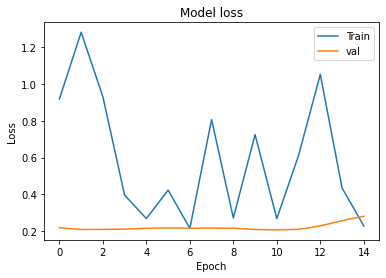

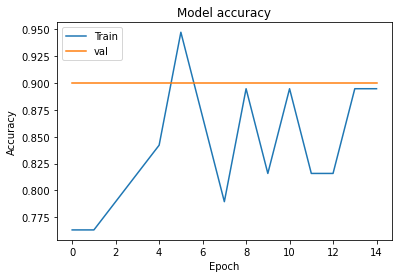

In [87]:
plot_loss(history1.history['loss'], history1.history['val_loss'])
# Plot train vs test accuracy during training
plot_accuracy(history1.history['accuracy'], history1.history['val_accuracy'])

***Saving model weights and biases***

In [88]:
wt = open('weights2.csv', 'w')
bs = open('biases2.csv', 'w')
for idx,i in enumerate(model.layers):
  if(isinstance(i, Dense)):
    weights = i.get_weights()[0]
    biases = i.get_weights()[1]
    weights = weights.flatten()
    biases = biases.flatten()
    print(weights.shape, biases.shape)
    wt.write(','.join(map(str,weights.tolist()))+"\n")
    bs.write(','.join(map(str,biases.tolist()))+"\n")

(368,) (184,)
(184,) (1,)


**ISSUES/IMPROVEMENT**

1. Dataset is very small.
2. DNN models are overfitting on the data.